<p style="text-align:left;">
    Lefort Tanguy
    <span style="float:right;">
        2019-2020
    </span>
</p>
<center>  M1 - Biostatistics - HMMA238 Développement Logiciel </center><br>

<center style="font-size:300%;"> <strong style="color:blue;"> Conway's game of life </strong> </center><br>

*****  

In [1]:
import numpy as np
import utils 
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib notebook

<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Implementation-without-numpy-" data-toc-modified-id="Implementation-without-numpy--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementation without numpy <a name="without"></a></a></span></li><li><span><a href="#Implementation-with-numpy" data-toc-modified-id="Implementation-with-numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementation with numpy</a></span><ul class="toc-item"><li><span><a href="#Simple-model" data-toc-modified-id="Simple-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple model</a></span></li><li><span><a href="#Random-model" data-toc-modified-id="Random-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random model</a></span></li><li><span><a href="#Specific-configurations" data-toc-modified-id="Specific-configurations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Specific configurations</a></span><ul class="toc-item"><li><span><a href="#Stable-configurations" data-toc-modified-id="Stable-configurations-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Stable configurations</a></span></li></ul></li></ul></li><li><span><a href="#Implementation-using-classes-and-numpy" data-toc-modified-id="Implementation-using-classes-and-numpy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementation using classes and numpy</a></span></li><li><span><a href="#Bonus-:-tore-like-model" data-toc-modified-id="Bonus-:-tore-like-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bonus : tore-like model</a></span></li></ul></div>

# Implementation without numpy <a name="without"></a>

Let's begin by implementing a seed that will be useful later on.

In [3]:
filename = "HMMA238_TP_tanguylefort.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6
print("My seed is {}.".format(ma_graine))

My seed is 5.


In order to implement the rules, we need the function right underneath which will allow us to get the number of living cells in the 8-neighborhood of another. This creates a list used in every step of the game.

In [4]:
def calcul_nb_voisins(Z):
    """Compute the number of neighbors.

    Keyword arguments:
        Z -- a 2D binary list of lists

    Returns:
        N -- a 2D list of lists the size of Z where each element is the sum of
        the values in the 8-neighborhood (the number of neighbors if Z is binary)
    """
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [5]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

N = calcul_nb_voisins(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


In [6]:
def iteration_jeu(Z):
    """Realize an iteration of Conway's game.

    As the rules state, one cell in the grid dies if it's surrounded by 4 or more living cells or stricly less than 2.
    A new cell is born if it's currently dead and there is exactly two living cells in the 8-neighborhood.
    Nothing happens in the other situations. We assume that the border is made of dead cells.

    Keyword arguments:
        Z -- a 2D list of lists representing the initial set of cells

    Returns:
        Z -- a 2D list of lists representing the state of the cells after one iteration of the game

    Example:
        >>> init_grid = [[0,0,0,0],[0,0,1,0],[0,1,1,0],[0,0,0,0]]
        >>> iteration_jeu(init_grid)
        [[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]]
    """
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

<IPython.core.display.Javascript object>


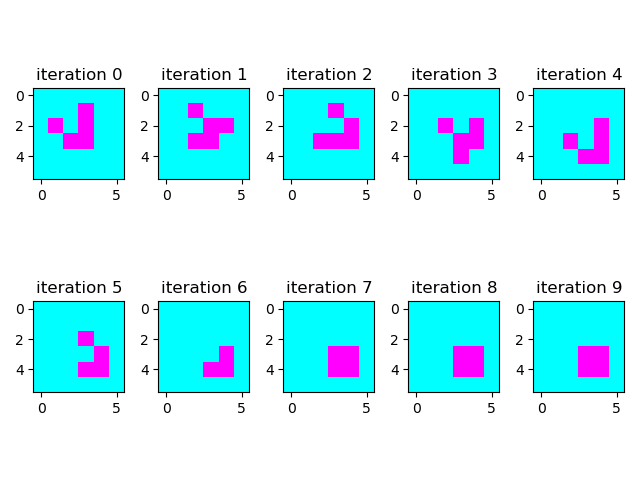

In [7]:
iterations = [0]*10
iterations[0] = Z
for i in range(1, 10):
    iterations[i] = iteration_jeu(np.copy(iterations[i-1]))

utils.display_sub(iterations, "First 10 iterations \
                  of Conway's game of life for our grid", 2, 5)

As we can see, the shape we've created (the glider) goes from the top left to the bottom right of our grid in the first $4$ iterations. After the $7^{th}$, we see that all iterations are and will be the same going as far as we want because of the $2\times 2$ square structure. Indeed, each living cell has exactly $3$ neighbors in a corner thus can't die or produce any descendant. With an "infinite" grid like a tore, there wouldn't have been this stabilization. We would have seen the $4$-step periodicity of the shape traveling at a speed of $1$-cell-each-$4$-iterations.

#  Implementation with numpy

## Simple model

In [8]:
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
nb_vect

array([0., 0., 1., 1., 1., 0.])

`nb_vect` is here the number of neighbors in the $2$-neighborhood of a binary grid considering its borders are dead.

In [9]:
def calcul_nb_voisins_np(Z):
    """Faster function to compute the number of neighbors using slicing.

    Keyword arguments:
    Z -- a 2D binary numpy array (or a coercible object to get one) 

    Returns:
    neig -- a numpy array the same shape as Z
    or a string explaining the array is not made of 0 and 1.
    """
    if not np.array_equal(np.unique(Z), np.array([0, 1])):
        return("Not a binary array : can't compute the number of neighbors.")
    neig = np.zeros_like(Z)
    go_through = Z[0:-2, 0:-2] + \
        Z[:-2, 2:] + \
        Z[2:, :-2] + \
        Z[:-2, 1:-1] + \
        Z[1:-1, 2:] + \
        Z[1:-1, :-2] + \
        Z[2:, 1:-1] + \
        Z[2:, 2:]
    # put the sums in the center and leave the borders dead
    neig[1:-1, 1:-1] = go_through
    return(neig)

Let's try this function on the array $Z$ and compare it to what we previously had. Let's note that we took more precautions with this function because we will use it more often as it is faster .

In [10]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]
np.array_equal(calcul_nb_voisins_np(np.array(Z)), N)

True

In [11]:
def iteration_jeu_np(Z):
    """Realize an iteration of Conway's game.

    As the rules state, one cell in the grid dies if it's surrounded by 4 or more living cells or stricly less than 2.
    A new cell is born if it's currently dead and there is exactly two living cells in the 8-neighborhood.
    Nothing happens in the other situations. We assume that the border is made of dead cells.

    Keyword arguments:
        Z -- a 2D binary numpy array

    Returns:
        Z -- a 2D binary numpy array representing the state of the cells after one iteration of the game

    Example:
        >>> init_grid = np.array([[0,0,0,0],[0,0,1,0],[0,1,1,0],[0,0,0,0]])
        >>> iteration_jeu_np(init_grid)
        [[0, 0, 0, 0]
         [0, 1, 1, 0]
         [0, 1, 1, 0]
         [0, 0, 0, 0]]
    """
    if not isinstance(Z, np.ndarray):
        Z = np.array(Z)
    old_Z = Z.copy()
    nrow, ncol = Z.shape
    N = calcul_nb_voisins_np(Z)
    for x in range(1, nrow-1):
        for y in range(1, ncol-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

<IPython.core.display.Javascript object>


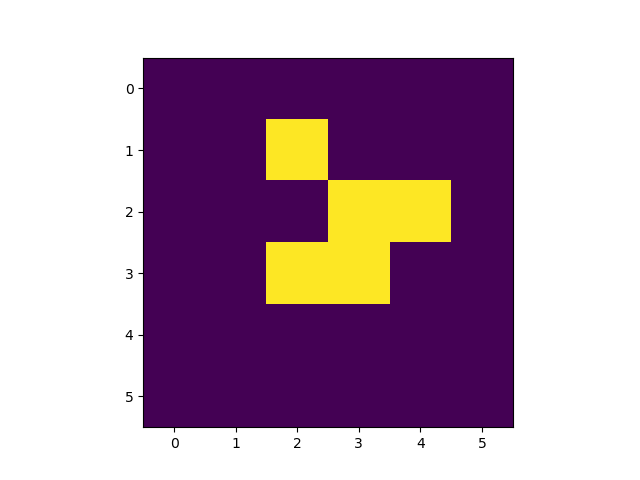

In [12]:
utils.display_one_plot(iteration_jeu_np(Z),'One iteration of the game with numpy.')

Now that we have the means to compute one iteration, the next step is the get the state of our array after any number of iterations. To do so, we will use the recursivity.

In [13]:
def jeu_np(Z_in,nb_iter):
    """Returns the state of the grid after nb_iter iterations of the grid.
    
    Keyword arguments:
    Z_in -- 2D binary numpy array for the initial state of the grid
    nb_iter -- a positive integer representing after how many steps we wish to see the game
    """
    if nb_iter == 0:
        return(Z_in)
    else:
        return(jeu_np(iteration_jeu_np(Z_in),nb_iter-1))

Now that we've got everything to compute the iterations of the game, a way to visualize what happens is an animation on a bigger grid.

<IPython.core.display.Javascript object>


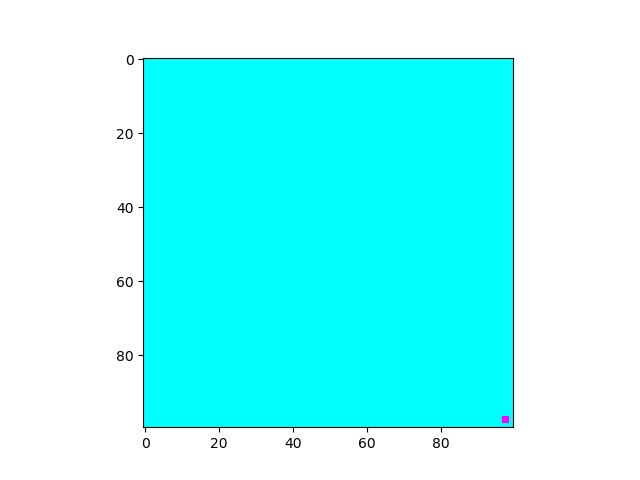

In [14]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
        [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np


utils.anim_game(Z_huge, iteration_jeu_np, 200, "Glider on a 100 x 100 grid")

We can see that the glider is traveling throughout the grid until the bottom-right where it gets stuck against the border. Because of this border it transforms into a stable square just like what happened after the $7^{th}$ iteration in the $6\times 6$ grid. A way to solve this issue (even if it's not really an issue) would be to make the glider disappear when it starts to become a square just like if it had gone too far to be seen. However this would work only for this initial grid. So another way that is proposed later on this project (in the last part) is to consider the grid as a tore and make the glider go back to the top-left of the grid.

## Random model 

In [15]:
proba = (1 + ma_graine) * 10 / 100  # 0.6
random_mat = np.random.binomial(size=100*100, n=1, p=proba).reshape(100, 100)
random_mat[0, :] = random_mat[-1, :] = random_mat[:, 0] = random_mat[:, -1] = 0

<IPython.core.display.Javascript object>


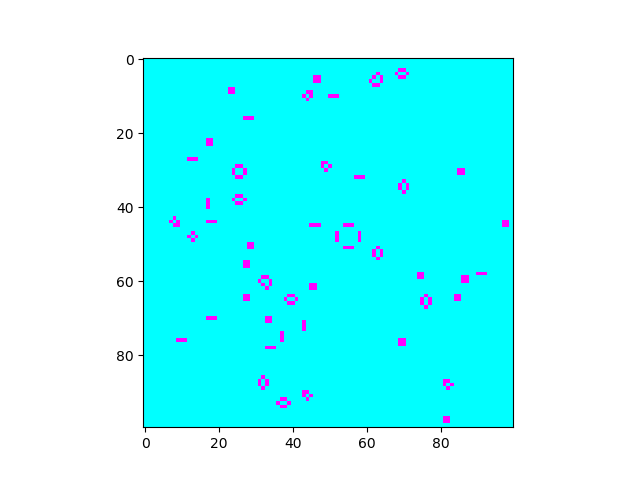

In [16]:
utils.anim_game(random_mat, iteration_jeu_np, 200,
                "Game of life with a random matrix")

## Specific configurations

With the random model, we can see that after some time several structures seem to appear. Because of the border there are mainly $3$ behaviors :
1. the pattern disappears,
1. the pattern stabilize and will remain the same forever,
1. the pattern is periodic.

Removing the case where the whole grid is dead, let's consider some of these cases.

<div class="alert alert-block alert-warning">
If the grid wasn't finite, we could have seen one more pattern : the structure goes on to infinity. One example of this behavior would be the glider. Indeed, it only stabilizes when getting stuck to a border. Thus without border it just goes on and on.
</div>

### Stable configurations

The most simple non trivial configuration is made with $2\times 2$ squares or separated by at least one dead cell from one another. Here we have $3$ of them spread on the diagonal.

<IPython.core.display.Javascript object>


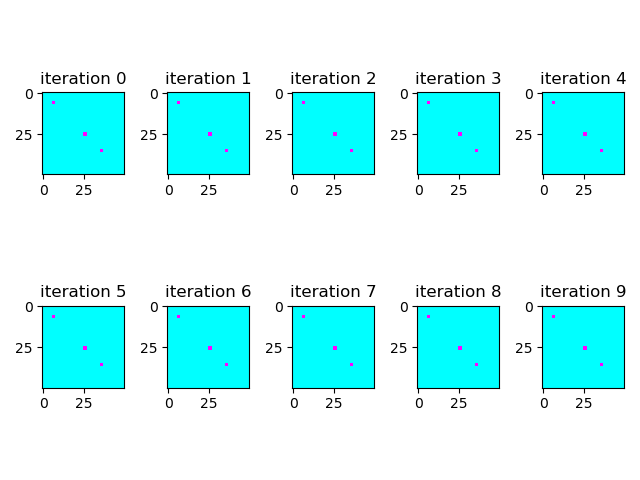

In [18]:
utils.plot_ten_iterations(
    utils.first_config, "Stable configuration with squares", iteration_jeu_np)

# Implementation using classes and numpy

# Bonus : tore-like model